# Aula #26 – Processamento de Linguagem Natural & Análise de Sentimento

# NLP

NLP (ou _Natural Language Processing_ - a sigla em português é PLN, _Processamento de Linguagem Natural_, mas essa sigla também é usada para falar de _Programação Neurolinguística_, então, vamos continuar usando NLP, ok?) é a área relacionada a técnicas para o entendimento de linguagem humana (a linguagem natural). A aplicação de técnicas de NLP tem sido vista em muitos domínios, desde a correção de palavras e sugestão de palavras na barra de busca de sites como o _Google_, até em sistemas mais "sofisticados" como os tradutores automáticos e os _home assistant_ e _smart assistants_, como Siri, Alexa ou Google Home, que podem auxiliar na execução de certas tarefas, como agendar compromissos, embora eles ainda [estejam longe de ser à prova de erros](https://www.nytimes.com/2018/05/25/business/amazon-alexa-conversation-shared-echo.html). Com o crescimento de conteúdo (mais artigos e mais fontes espalhadas), a importância do NLP também tem crescido, pois tarefas como sumarização automática e classificação automática de conteúdo (por ex., para checagem contra _fake news_) são cada vez mais necessárias em nossas vidas.

Nesta aula, vamos focar no uso de algumas técnicas de NLP para processamento de texto. Entretanto, é importante lembrar que NLP não se restringe a textos escritos, podendo ser aplicado também para processamento de fala, como é o caso dos _smart assistants_.

Diferentes tarefas de NLP, em geral, têm como passos iniciais as seguintes etapas:

* pré-processamento do texto (que pode ser uma combinação de diferentes processamentos, envolvendo modificações a nível de palavra e identificação de entidades/funções sintáticas/etc.)

* transformação do texto em quantidades numéricas (tipicamente vetores de números inteiros ou reais)

## Agenda de hoje

* análise de sentimento (detecção de polaridade)

* ferramenta para encontrar ingredientes que combinam (usando _embeddings_ criados por _word2vec_)

## Análise de sentimento

Esse conjunto de dados é composto de reviews de produtos coletados do site `Americanas.com` entre janeiro e maio de 2018.

Mais informações podem ser encontradas no [repositório b2w-reviews01](https://github.com/b2wdigital/b2w-reviews01).

In [55]:
import pandas as pd

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
!wget -P data/datasets/b2w_reviews https://github.com/b2wdigital/b2w-reviews01/raw/master/B2W-Reviews01.csv

--2019-11-30 13:11:44--  https://github.com/b2wdigital/b2w-reviews01/raw/master/B2W-Reviews01.csv
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/b2wdigital/b2w-reviews01/master/B2W-Reviews01.csv [following]
--2019-11-30 13:11:45--  https://raw.githubusercontent.com/b2wdigital/b2w-reviews01/master/B2W-Reviews01.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.92.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.92.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50591578 (48M) [text/plain]
Saving to: ‘data/datasets/b2w_reviews/B2W-Reviews01.csv.7’

B2W-Reviews01.csv.7 100%[===================>]  48,25M  1,59MB/s    in 28s     

2019-11-30 13:12:14 (1,70 MB/s) - ‘data/datasets/b2w_reviews/B2W-Reviews01.csv.7’ saved [50591578/5059157

In [58]:
selected_cols = ['product_name', 'product_brand', 'site_category_lv1', 'site_category_lv2',
                 'review_title', 'review_text', 'recommend_to_a_friend']

path = 'data/datasets'
reviews_df = pd.read_csv(f'{path}/b2w_reviews/B2W-Reviews01.csv', sep=';', low_memory=False)[selected_cols].fillna('')

In [59]:
reviews_df.head()

,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend
0,Notebook Asus Vivobook Max X541NA-GO472T Intel...,,Informática,Notebook,Bom,Estou contente com a compra entrega rápida o ú...,Yes
1,Copo Acrílico Com Canudo 500ml Rocie,,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade","Por apenas R$1994.20,eu consegui comprar esse ...",Yes
2,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes
3,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,Yes
4,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente","A entrega foi no prazo, as americanas estão de...",Yes


In [60]:
reviews_df['text'] = reviews_df['review_title'] + ' ' + reviews_df['review_text']

In [61]:
reviews_df.iloc[0]['text']

'Bom Estou contente com a compra entrega rápida o único problema com as Americanas é se houver troca ou devolução do produto o consumidor tem problemas com espera.'

In [62]:
reviews_df[reviews_df['text'].str.len() == 0]

,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,review_text,recommend_to_a_friend,text


In [63]:
reviews_df['recommend_to_a_friend'].value_counts()

Yes    96368
No     35987
          18
Name: recommend_to_a_friend, dtype: int64

In [64]:
reviews_df[['text', 'recommend_to_a_friend']].head()

,text,recommend_to_a_friend
0,Bom Estou contente com a compra entrega rápida...,Yes
1,"Preço imbatível, ótima qualidade Por apenas R$...",Yes
2,ATENDE TODAS AS EXPECTATIVA. SUPERA EM AGILIDA...,Yes
3,presente mais que desejado MEU FILHO AMOU! PAR...,Yes
4,"Sem duvidas, excelente A entrega foi no prazo,...",Yes


Como podemos ver, tanto no dataset de treino, como no de teste, temos o texto e polaridade da sentença. Nosso objetivo é construir um **classificador de sentimentos**, que recebe uma sentença (referente a um review de produto) e é capaz de predizer se o review é positivo (o usuário recomendaria a um amigo) ou negativo (o usuário **não** recomendaria a um amigo).

In [65]:
reviews_df.sample(n=10)['text'].tolist()

['Produto de baixíssima qualidade. Quebrou na montagem Produto extremamente frágil, quebrou na montagem. Produto chegou rápido, já com frisos. Ao desembalar partiu no meio. Nao recomendo tal produto, material parece frágil como papelão',
 'Não recebi o produto Produto não entregue. Estou me sentido engando e roubado, pois paguei e não recebi. Uma droga de serviço. Não recomendo!',
 'produto falso Produto não condiz com o vendido no site,estou tentando efetuar a troca a vários dias e até o momento não me deram retorno.Decepcionada com a Americanas.',
 'Recomendo!!!!! Produto entregue em tempo hábil e exatamente conforme descrição disposta no site!!!!  Recomendo a todos!!!!!!!',
 'Gostei! Muito prático e eficiente. Recomendo a compra do produto prático e eficiente.',
 'Produto exelente Estou gostando muito,  a entrega foi bem rápida recomendo a todos!!',
 'Não recebi Até agora não recebi o produto . E não obtive nenhuma resposta.',
 'Bom produto. O produto é bom, embora eu não o tenha us

**Nos exemplos de frases acima, podemos ver que as sentenças incluem pontuações, acentos, letras maiúsculas e minúsculas... Seria ideal que conseguíssemos _normalizar_ o texto, de forma a diminuir a quantidade de palavras diferentes.**

### Normalização do texto

Técnicas comuns:

* remoção de acentos

* remoção de palavras muito comuns (_stopwords_)

* remoção de pontuação

* remoção de dígitos

* padronização para letras minúsculas (ou maiúsculas)

* _stemming_ / _lematização_ - redução de palavras relacionadas a uma forma mínima comum (ex. `construirá -> construir`, `construção -> construir`)

* correção de palavras escritas incorretamente (uso de spellchecker)

**Leia mais:**

* sobre a diferença entre stemming e lematização em [uma discussão no StackOverflow](https://stackoverflow.com/questions/1787110/what-is-the-true-difference-between-lemmatization-vs-stemming);

* sobre a situação atual em relação à lematização para a língua portuguesa nesse [blog post](https://lars76.github.io/nlp/lemmatize-portuguese/).

**Atenção:** todas essas técnicas envolvem operações com `strings`. Como estamos trabalhando com um dataframe Pandas, quando possível, vamos usar os métodos descritos [na documentação do Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).

#### Remoção de acentos

In [66]:
reviews_df['norm_text'] = reviews_df['text'].str.normalize('NFKD').str.encode('ascii', 'ignore').str.decode('utf-8')

Forma alternativa:

>```python
> from unicodedata import normalize
>
> def remove_accents(text):
    return normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
>
> reviews_df['norm_text'] = reviews_df['text'].apply(normalize_text)
>```

In [67]:
reviews_df[['text', 'norm_text']].head()

,text,norm_text
0,Bom Estou contente com a compra entrega rápida...,Bom Estou contente com a compra entrega rapida...
1,"Preço imbatível, ótima qualidade Por apenas R$...","Preco imbativel, otima qualidade Por apenas R$..."
2,ATENDE TODAS AS EXPECTATIVA. SUPERA EM AGILIDA...,ATENDE TODAS AS EXPECTATIVA. SUPERA EM AGILIDA...
3,presente mais que desejado MEU FILHO AMOU! PAR...,presente mais que desejado MEU FILHO AMOU! PAR...
4,"Sem duvidas, excelente A entrega foi no prazo,...","Sem duvidas, excelente A entrega foi no prazo,..."


#### Padronização para letras minúsculas

In [68]:
reviews_df['norm_text'] = reviews_df['norm_text'].str.lower()

In [69]:
reviews_df[['text', 'norm_text']].head()

,text,norm_text
0,Bom Estou contente com a compra entrega rápida...,bom estou contente com a compra entrega rapida...
1,"Preço imbatível, ótima qualidade Por apenas R$...","preco imbativel, otima qualidade por apenas r$..."
2,ATENDE TODAS AS EXPECTATIVA. SUPERA EM AGILIDA...,atende todas as expectativa. supera em agilida...
3,presente mais que desejado MEU FILHO AMOU! PAR...,presente mais que desejado meu filho amou! par...
4,"Sem duvidas, excelente A entrega foi no prazo,...","sem duvidas, excelente a entrega foi no prazo,..."


#### Remoção de dígitos

Aqui, para facilitar, vamos usar expressões regulares, um tópico que estava no `Pré-aula`.

Para relembrar: https://regexone.com/lesson/letters_and_digits

In [70]:
reviews_df['norm_text'] = reviews_df['norm_text'].str.replace(r'[0-9]', '')

Forma alternativa **sem** usar expressões regulares:

> ```python
> for digit in range(10):
    reviews_df['norm_text'] = reviews_df['norm_text'].str.replace(str(digit), '')
> ``` 

Forma alternativa usando expressões regulares, explicitamente usando a biblioteca [re](https://docs.python.org/3.6/library/re.html):

> ```python
> import re
>
> def replace_digits(text):
    return re.sub(r'\d', '', text)
> 
> reviews_df['norm_text'] = reviews_df['norm_text'].apply(replace_digits)
> ```

In [71]:
reviews_df[reviews_df['text'].str.contains('0')][['text', 'norm_text']].head()

,text,norm_text
1,"Preço imbatível, ótima qualidade Por apenas R$...","preco imbativel, otima qualidade por apenas r$..."
2,ATENDE TODAS AS EXPECTATIVA. SUPERA EM AGILIDA...,atende todas as expectativa. supera em agilida...
21,TV Espetacular Pontos Positivos Painel de 10bi...,tv espetacular pontos positivos painel de bits...
68,"7 Muito bom veio no esperado,Não pensei que vi...","muito bom veio no esperado,nao pensei que vin..."
69,Ainda não recebi Comprei o produto dia 30/11 a...,ainda nao recebi comprei o produto dia / ate h...


#### Remoção de pontuação

Para remover a pontuação, podemos usar o próprio módulo `string` do python, que já tem mapeadas as pontuações de texto possíveis.

In [72]:
import string

translation_table = str.maketrans({key: ' ' for key in string.punctuation}) 

def remove_punctuation(text):
    return text.translate(translation_table)

* vamos testar a função?

In [73]:
print('Quando ela olhou, gritei bem alto: \n - "Não me engana, não, hein?!"')

Quando ela olhou, gritei bem alto: 
 - "Não me engana, não, hein?!"


In [74]:
remove_punctuation('Quando ela olhou, gritei bem alto: \n - "Não me engana, não, hein?!"')

'Quando ela olhou  gritei bem alto  \n    Não me engana  não  hein   '

In [75]:
reviews_df['norm_text'] = reviews_df['norm_text'].apply(remove_punctuation)

In [76]:
reviews_df[reviews_df['text'].str.contains('!')][['text', 'norm_text']].head()

,text,norm_text
3,presente mais que desejado MEU FILHO AMOU! PAR...,presente mais que desejado meu filho amou par...
10,Fantástico Comprei um pra cara membro da famíl...,fantastico comprei um pra cara membro da famil...
11,Maravilhoso!!! Produto maravilhoso! Não é baru...,maravilhoso produto maravilhoso nao e baru...
19,Vou usa-la A capa não decepcionou por enquanto...,vou usa la a capa nao decepcionou por enquanto...
21,TV Espetacular Pontos Positivos Painel de 10bi...,tv espetacular pontos positivos painel de bits...


#### Remoção de stopwords

In [77]:
import nltk

In [78]:
#nltk.download('stopwords')

In [79]:
' / '.join(nltk.corpus.stopwords.words('portuguese'))

'de / a / o / que / e / é / do / da / em / um / para / com / não / uma / os / no / se / na / por / mais / as / dos / como / mas / ao / ele / das / à / seu / sua / ou / quando / muito / nos / já / eu / também / só / pelo / pela / até / isso / ela / entre / depois / sem / mesmo / aos / seus / quem / nas / me / esse / eles / você / essa / num / nem / suas / meu / às / minha / numa / pelos / elas / qual / nós / lhe / deles / essas / esses / pelas / este / dele / tu / te / vocês / vos / lhes / meus / minhas / teu / tua / teus / tuas / nosso / nossa / nossos / nossas / dela / delas / esta / estes / estas / aquele / aquela / aqueles / aquelas / isto / aquilo / estou / está / estamos / estão / estive / esteve / estivemos / estiveram / estava / estávamos / estavam / estivera / estivéramos / esteja / estejamos / estejam / estivesse / estivéssemos / estivessem / estiver / estivermos / estiverem / hei / há / havemos / hão / houve / houvemos / houveram / houvera / houvéramos / haja / hajamos / haja

**_Ponto importante_:** Como nossa tarefa é uma análise de sentimentos, seria muito ruim perder certas _stopwords_ como palavras de negação, afinal, "Eu **não** gosto disso"  é muito diferente de "Eu gosto disso"!

Assim, vamos manter algumas das palavras que podem ser essenciais para a classificação:

* `não`

* `mas`

Ou seja, gostaríamos de remover as palavras `não` e `mas` da lista de stopwords fornecida pelo `nltk`. Além disso, note que essa lista contém acentos. Vamos retirá-los.

In [80]:
from unicodedata import normalize

def remove_accents(text):
    return normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')

**Tarefa:** 

Crie uma lista chamada `stopwords` que contém todas as palavras de `nltk.corpus.stopwords.words('portuguese')`, exceto as palavras `não` e `mas`. A cada palavra deve ser aplicada a função `normalize_text`.

1. defina uma lista chamada `not_allowed` com as palavras "não" e "mas".
2. crie uma lista vazia chamada stopwords
3. faça um loop para percorrer cada uma das palavras de `nltk.corpus.stopwords.words('portuguese')`
    * a cada loop, você deve checar se a palavra atual está contida dentro de `not_allowed`
    * se **não** estiver, você deve incluir a palavra à lista de stopwords

<!-- 
not_allowed = ["não", "mas"]
stopwords = []
for word in nltk.corpus.stopwords.words('portuguese'):
    if word not in not_allowed:
        stopwords.append(remove_accents(word))
-->

In [82]:
not_allowed = ["não", "mas"]
stopwords = []
for word in nltk.corpus.stopwords.words('portuguese'):
    if word not in not_allowed:
        stopwords.append(remove_accents(word))

In [83]:
' / '.join(stopwords)

'de / a / o / que / e / e / do / da / em / um / para / com / uma / os / no / se / na / por / mais / as / dos / como / ao / ele / das / a / seu / sua / ou / quando / muito / nos / ja / eu / tambem / so / pelo / pela / ate / isso / ela / entre / depois / sem / mesmo / aos / seus / quem / nas / me / esse / eles / voce / essa / num / nem / suas / meu / as / minha / numa / pelos / elas / qual / nos / lhe / deles / essas / esses / pelas / este / dele / tu / te / voces / vos / lhes / meus / minhas / teu / tua / teus / tuas / nosso / nossa / nossos / nossas / dela / delas / esta / estes / estas / aquele / aquela / aqueles / aquelas / isto / aquilo / estou / esta / estamos / estao / estive / esteve / estivemos / estiveram / estava / estavamos / estavam / estivera / estiveramos / esteja / estejamos / estejam / estivesse / estivessemos / estivessem / estiver / estivermos / estiverem / hei / ha / havemos / hao / houve / houvemos / houveram / houvera / houveramos / haja / hajamos / hajam / houvesse

* note que há palavras repetidas, por termos removido os acentos. Vamos retirá-las transformando `stopwords` em um _set_ (uma estrutura de dados de conjunto, que automaticamente remove repetições)

In [84]:
stopwords = set(stopwords)

In [85]:
' / '.join(stopwords)

'isso / houveria / teve / pelas / num / teriam / esteja / teu / estiveramos / seriam / tinhamos / seu / ao / terao / hao / somos / tenha / sou / por / minha / estive / fossem / nosso / terei / estiveram / entre / o / aquele / minhas / houveramos / nossas / havemos / delas / estas / no / como / qual / pelo / tiveramos / voce / depois / sem / muito / teremos / aquelas / nem / mais / quando / tive / tivemos / estava / estivermos / houveriam / esta / eles / tem / hajamos / seremos / teus / estes / este / estiverem / tivessem / houverei / as / pelos / uma / eu / tivermos / eram / fossemos / tu / seria / fomos / dele / mesmo / houvemos / eramos / pela / lhe / a / seriamos / estivesse / na / aquela / ha / os / aos / suas / tinham / sao / se / serao / houver / nossa / lhes / te / estamos / haja / for / serei / das / dela / estao / houvermos / um / houvesse / quem / hei / houverem / esses / houveriamos / formos / ele / isto / houveram / tivessemos / em / nas / houvera / de / tinha / tivera / at

* salvando o dataset para uso futuro

In [86]:
reviews_df.to_csv('data/datasets/b2w_reviews/normalized_reviews.csv', index=False)

### Modelo (finalmente!!!)

Finalmente, chegamos à parte de treinar o modelo de análise de sentimentos!!!

Ou quase... na verdade, antes de treinar o modelo, precisamos transformar o texto em _features_ numéricas.

A maneira mais simples de transformar um texto em um vetor de números é usando o método comumente chamado de _Bag of words_.

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
examples_for_bow = [
    'camisa preta',
    'botao feito linha preta',
    'considera-se caro preco botao camisa botao',
    'linha costurar botão mesma camisa',
    'costurar linha camisa mesma botao'
]

In [89]:
cv = CountVectorizer(max_features=5, strip_accents='unicode', binary=True)

In [90]:
bow_matrix = cv.fit_transform(examples_for_bow)
bow_matrix

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [91]:
bow_matrix.todense()

matrix([[0, 1, 0, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])

In [92]:
cv.vocabulary_

{'camisa': 1, 'botao': 0, 'linha': 3, 'costurar': 2, 'mesma': 4}

In [93]:
pd.DataFrame(bow_matrix.todense(), columns=sorted(cv.vocabulary_.items(), key=lambda item: item[1]))

,"(botao, 0)","(camisa, 1)","(costurar, 2)","(linha, 3)","(mesma, 4)"
0,0,1,0,0,0
1,1,0,0,1,0
2,1,1,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1


Note que os exemplos `3` e `4` têm a mesma representação numérica, mesmo que a ordem das palavras não seja a mesma! Essa é uma característica desse método.

### Divisão de dataset em treino e teste

**Tarefa:** Divida o dataframe `reviews_df` em um dataframe de treino (`train_df`) e um de teste (`test_df`)

1. crie uma variável chamada `target_vals` com os valores da coluna `target` em uma lista
2. use a função do sklearn `train_test_split` para dividir o dataframe. Lembre-se de usar o parâmetro `stratify`, passandro para ele a variável `target_vals`.
    
<!-- 
target_vals = reviews_df['recommend_to_a_friend'].values
train_df, test_df = train_test_split(reviews_df, test_size=0.2, stratify=target_vals)
-->

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
target_vals = reviews_df['recommend_to_a_friend'].values
train_df, test_df = train_test_split(reviews_df, test_size=0.2, stratify=target_vals)

In [96]:
len(train_df), len(test_df)

(105898, 26475)

In [97]:
train_df[['norm_text', 'recommend_to_a_friend']].head()

,norm_text,recommend_to_a_friend
71421,excelente valeu cada centavo muito bom ...,Yes
122414,excelente produto muito bom e chegou super rap...,Yes
122728,camara de vigilancia satisfeito com compra ap...,Yes
129130,luzes ele faz o mesmo servico dos outros mas ...,No
80185,gostei muito pratico funciona perfeitamente ...,Yes


In [98]:
test_df[['norm_text', 'recommend_to_a_friend']].head()

,norm_text,recommend_to_a_friend
88747,demora na entrega do produto pessoal o produt...,No
96978,pessimo produto e demora na entrega demora na ...,No
81349,ainda nao recebi o produto ha um mes de te lo ...,No
12920,muito bom o produto e preco excelente muito b...,Yes
47458,falta de comprometimento para entrega nao entr...,No


In [99]:
train_df['y'] = (train_df['recommend_to_a_friend'] == 'Yes').astype(int)
test_df['y'] = (test_df['recommend_to_a_friend'] == 'Yes').astype(int)

#### Treino do classificador Decision Tree

Uma vantagem de usar a árvore de decisão é que ela é interpretável: ao final do treino, poderemos ver quais são as palavras que mais importam e explorar um pouco as regras de decisão para cada classificação.

**Leia mais:** Se quiser um exemplo usando outro tipo de algoritmo, você pode ver esse [post no Medium](https://medium.com/@minbaekim/text-mining-preprocess-and-naive-bayes-classifier-da0000f633b2). 

**Aprofunde-se:** Veja a diferença entre utilizar SVM (Support Vector Machines) e Decision Trees para classificação de texto [aqui](https://www.codementor.io/blog/text-classification-6mmol0q8oj).

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [101]:
steps = [
    ('vect', CountVectorizer(max_features=200, stop_words=stopwords)),
    ('clf', DecisionTreeClassifier(min_samples_leaf=10, class_weight='balanced'))
]

pipeline = Pipeline(steps)

In [102]:
X_train = train_df['norm_text'].values
y_train = train_df['y'].values

In [103]:
sentiment_analyzer = pipeline.fit(X_train, y_train)

**Tarefa:** Teste seu classificador usando um texto de exemplo. Veja que você pode usar tanto o método `predict` como o método `predict_proba`.

1. crie uma variável `text` com qualquer texto ou com o texto de uma das avaliações do dataset
2. faça uma chamada com `sentiment_analyzer.predict` ou `sentiment_analyzer.predict_proba` passando como parâmetro uma lista contendo a variável `text`: `[text]`


<!-- 
text = test_df.iloc[0]['norm_text']
sentiment_analyzer.predict([text])
sentiment_analyzer.predict_proba([text])
-->

In [104]:
text = test_df.iloc[0]['norm_text']

In [105]:
sentiment_analyzer.predict([text])

array([0])

In [106]:
sentiment_analyzer.predict_proba([text])

array([[0.57233003, 0.42766997]])

#### Plotando as features mais importantes

In [107]:
from sklearn import tree

In [108]:
vect = sentiment_analyzer.named_steps['vect']

In [109]:
features = vect.get_feature_names()

In [110]:
sorted_features = sorted(zip(features, sentiment_analyzer.named_steps['clf'].feature_importances_), key=lambda elem: elem[1], reverse=True)

In [111]:
import matplotlib.pyplot as plt

In [112]:
plt.rcParams['axes.axisbelow'] = True

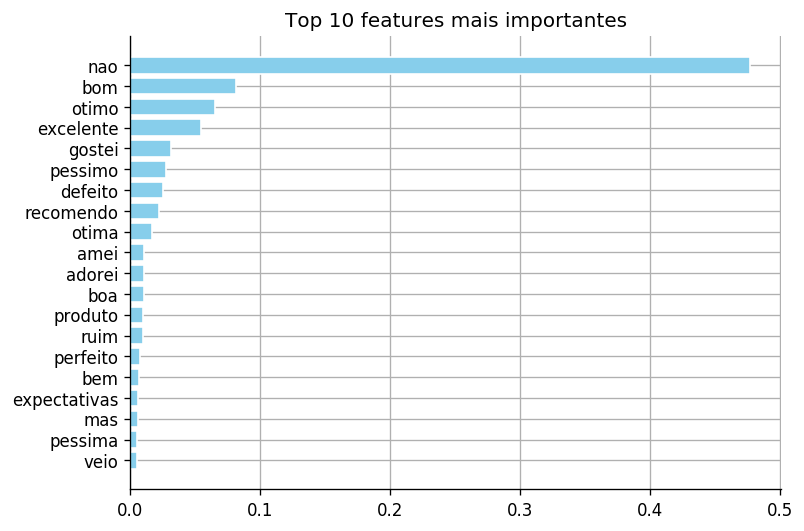

In [113]:
fig = plt.figure(figsize=(7, 5), dpi=120)
ax = fig.add_subplot(111)
plt.barh(*zip(*sorted_features[:20][::-1]), color='skyblue', edgecolor='w')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.grid()
plt.title('Top 10 features mais importantes')
plt.show()

* profundidade da árvore

In [114]:
sentiment_analyzer.named_steps['clf'].get_depth()

125

* note o parâmetro `max_depth=2`, que indica que vamos plotar apenas até o nível de profundidade 2 da árvore

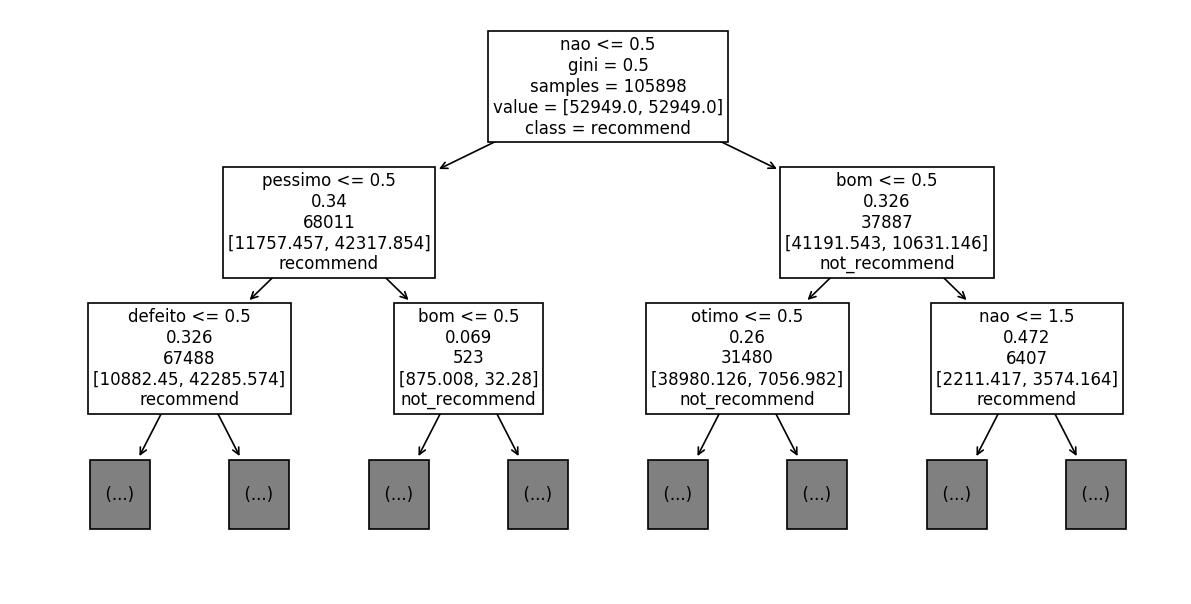

In [115]:
fig = plt.figure(figsize=(12, 6), dpi=120)
ax = fig.add_subplot(111)
_ = tree.plot_tree(sentiment_analyzer.named_steps['clf'], max_depth=2, label='root', proportion=False,
    feature_names=features, class_names=['not_recommend', 'recommend'], ax=ax, fontsize=10)

#### Avaliação do classificador

**Tarefa:** Faça a predição da coluna `norm_text` e compare o resultado com o vetor target (coluna `y`).

1. crie a variável `X_test` (dica: veja como criamos a variável `X_train`. Deve ser a mesma coisa, utilizando agora o dataframe `test_df`)
2. crie a variável `y_test` (dica: veja como criamos a variável `y_train`. Deve ser a mesma coisa, utilizando agora o dataframe `test_df`)
3. crie a variável `y_pred` com as predições do modelo `sentiment_analyzer` em `X_train`
4. imprima o [classification_report](https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) usando como parâmetros `y_test`, `y_pred` e como `target_names` uma lista `['positive', 'negative']`.

<!-- 
X_test = test_df['norm_text'].values
y_test = test_df['y'].values
y_pred = sentiment_analyzer.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))
-->

In [116]:
from sklearn.metrics import classification_report, confusion_matrix

In [117]:
X_test = test_df['norm_text'].values
y_test = test_df['y'].values

In [118]:
y_pred = sentiment_analyzer.predict(X_test)

In [119]:
print(classification_report(y_test, y_pred, target_names=['negative', 'positive']))

              precision    recall  f1-score   support

    negative       0.74      0.90      0.81      7201
    positive       0.96      0.88      0.92     19274

    accuracy                           0.89     26475
   macro avg       0.85      0.89      0.87     26475
weighted avg       0.90      0.89      0.89     26475



* matriz de confusão

|      | pred_0| pred_1|
|------|-------|-------|
|   0  |  TN   |  FP   |
|   1  |  FN   |  TP   |

In [120]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['pred_0', 'pred_1'])

,pred_0,pred_1
0,6455,746
1,2254,17020


**Pergunta final:** O que você achou do classificador? Ele é bom ou ruim?

### Mais considerações e possíveis modificações

Note que após aplicar o _Bag of words_, também poderíamos ter aplicado a transformação Tfidf, que discrimina as palavras de acordo com a "relevância" delas em cada documento em relação ao _corpus_ (i.e. o conjunto total de documentos).

**Tarefa Bônus:** Inclua no _pipeline_ a transformação `Tfidf` e compare os resultados.

Vimos que nosso classificador possui tanto o método `predict` como o método `predict_proba`. Ao usar o método `predict_proba`, temos as probabilidades de que o texto seja `positive` ou `negative`. Podemos escolher um _threshold_ de forma a maximizar uma das métricas.

**Tarefa Bônus:** Escolha esse threshold de forma a maximizar nosso `recall` de exemplos positivos.

In [121]:
# !python -m spacy download pt_core_news_sm

Outra alternativa seria processar o texto de uma maneira diferente: imagine que só quiséssemos incluir três tipos de classes gramaticais: verbo, adjetivo e advérbio, que normalmente são as classes que indicam o sentimento de um indivíduo em relação a alguma coisa.

Um módulo bastante utilizado em NLP é o [spacy](https://spacy.io/). No `spacy`, é possível treinar um modelo para que ele reconheça certas estruturas comuns em textos de uma determinada língua. No caso do inglês (e também do português), podemos baixar o modelo e começar a usar!

Além de ser bem completo, ele costuma ser mais rápido que o módulo "concorrente" `nltk`. [Esse benchmark](https://blog.thedataincubator.com/2016/04/nltk-vs-spacy-natural-language-processing-in-python/) compara três tarefas (tokenização de palavras, tokenização de sentenças e classificação gramatical - comumente chamado de PoS tag, _part-of-speech tag_), que é o que queremos fazer.

No modelo do `spacy`, é possível identificar os seguintes tipos de PoS tag:

* ADJ
* ADP
* ADV
* CONJ
* DET
* INTJ
* NOUN
* PART (e.g. possessive marker _'s_)
* PRON
* PROPN
* PUNCT
* SPACE
* SYM
* VERB
* X (unknown)

**Obs.:** na verdade isso vale para o _coarse-grained PoS tag_ (que é visto chamando o atributo `pos` de um objeto `Token`), para o _fine-grained PoS tag_, há muito [mais classificações disponíveis](https://spacy.io/api/annotation).

**Usando o spacy**

Ao fazer uma chamada do tipo `nlp(text)`, é aplicado o pipeline composto pelo `tagger` (PoS tag), `parser` (_parseador_ de dependências) e `ner` (reconhecimento de entidades) no texto. O retorno é um objeto do tipo `Doc`, que é uma sequência de objetos `Token`. Cada uma dos objetos `Token` terá o atributo `pos_`, que trará a classe gramatical.

In [122]:
import spacy

In [123]:
nlp = spacy.load('pt_core_news_sm')

In [124]:
doc = nlp('Ótimo produto, porém embalagem péssima. O "saco" que veio o tênis chegou todo rasgado por causa da pessima embalagem.')

In [125]:
for token in doc:
    print(token, token.pos_)

Ótimo PRON
produto NOUN
, PUNCT
porém ADV
embalagem NOUN
péssima ADJ
. PUNCT
O DET
" PROPN
saco PROPN
" PUNCT
que PRON
veio VERB
o DET
tênis NOUN
chegou VERB
todo ADV
rasgado VERB
por ADP
causa NOUN
da ADP
pessima ADJ
embalagem NOUN
. PUNCT


Assim, se imprimíssemos somente as palavras de classe `ADJ`, `ADV` e `VERB`, teríamos:

In [126]:
allowed_pos = set(['ADJ', 'ADV', 'VERB'])
for token in doc:
    if token.pos_ not in allowed_pos:
        continue
    print(token, token.pos_)

porém ADV
péssima ADJ
veio VERB
chegou VERB
todo ADV
rasgado VERB
pessima ADJ


Como podemos ver, ele não acerta tudo, mas já pode ser suficiente para nós.

Uma alternativa ao `spacy` é usar a biblioteca [nlpnet](https://github.com/erickrf/nlpnet) para extrair as classes gramaticais.

**Tarefa Bônus:** Filtre os adjetivos, advérbios e verbos do texto e construa um novo modelo que use esse novo texto como input e avalie o resultado.